In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

100%|██████████| 2.29G/2.29G [00:20<00:00, 118MB/s]

Extracting files...


In [ ]:
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


Sample Images


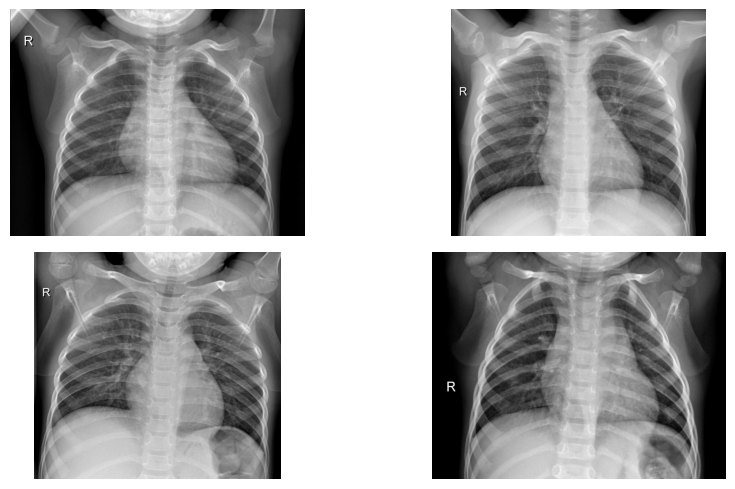

In [18]:
import os
import random
import matplotlib.pyplot as plt

# Location of images
path = '/root/cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train/NORMAL'
image_files = os.listdir(path)

print('Sample Images')

# Set the size of the images
plt.figure(figsize=(10,5))

# Select and display random images
for i in range(4):
    plt.subplot(2, 2, i + 1)
    img = plt.imread(os.path.join(path, image_files[random.randrange(0, len(image_files))]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

# Adjust subplot parameters so that images are more evenly padded
plt.tight_layout()

In [57]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(rescale=1/255)

# Indicate the location of our images
train_folder = "/root/cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train"

# Provide images to the machine in batches using the train_data_generator
train_generator = train_data_generator.flow_from_directory(
        train_folder,
        target_size=(150, 150), # images will be resized to 150x150
        batch_size=100,
        class_mode="binary")   # We use "binary" because there are two classes


Found 5216 images belonging to 2 classes.


In [20]:
from tensorflow.keras import models, layers

model = models.Sequential([
    # The input shape is the shape of all images (150x150); there are 3 color channels (RGB)
    # Layer 1
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(),

    # Layer 2
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    # Layer 3
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    # Layer 4
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    # Layer 5
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    # Flatten (combine) the learned features for prediction
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


# 'binary_crossentropy' (this is a binary task) tells the model how to measure its loss (error)
# 'adam' indicates how the model will adjust it weights, while learning, to decrease its loss (error)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
fitting = model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=3)

Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.8915 - loss: 0.2772
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.9074 - loss: 0.2105
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9266 - loss: 0.1688


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [50]:
import os

directory = '/root/cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test/'
print(os.listdir(directory))


['NORMAL', 'PNEUMONIA']


In [52]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Directory path
directory = '/root/cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val/'
test_images = [f for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

for file_name in test_images:
    path = os.path.join(directory, file_name)
    try:
        test_img = image.load_img(path, target_size=(150, 150))
        img = image.img_to_array(test_img)  # Convert to array
        img /= 255.0  # Normalize the image
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        print(f"Processed {file_name} successfully.")
    except Exception as e:
        print(f"Error processing {file_name}: {e}")


In [53]:
print(os.listdir(directory))


['NORMAL', 'PNEUMONIA']


In [54]:
normal_path = os.path.join(directory, 'NORMAL')
pneumonia_path = os.path.join(directory, 'PNEUMONIA')

print(os.listdir(normal_path))  # Check files in NORMAL
print(os.listdir(pneumonia_path))  # Check files in PNEUMONIA


['NORMAL2-IM-1436-0001.jpeg', 'NORMAL2-IM-1438-0001.jpeg', 'NORMAL2-IM-1440-0001.jpeg', 'NORMAL2-IM-1430-0001.jpeg', 'NORMAL2-IM-1437-0001.jpeg', 'NORMAL2-IM-1431-0001.jpeg', 'NORMAL2-IM-1442-0001.jpeg', 'NORMAL2-IM-1427-0001.jpeg']
['person1947_bacteria_4876.jpeg', 'person1951_bacteria_4882.jpeg', 'person1952_bacteria_4883.jpeg', 'person1946_bacteria_4874.jpeg', 'person1954_bacteria_4886.jpeg', 'person1949_bacteria_4880.jpeg', 'person1946_bacteria_4875.jpeg', 'person1950_bacteria_4881.jpeg']


In [55]:
for category in ['NORMAL', 'PNEUMONIA']:
    category_path = os.path.join(directory, category)
    image_files = [f for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    for file_name in image_files:
        path = os.path.join(category_path, file_name)
        try:
            test_img = image.load_img(path, target_size=(150, 150))
            img = image.img_to_array(test_img)
            img /= 255.0
            img = np.expand_dims(img, axis=0)
            print(f"Processed {file_name} in {category} successfully.")
        except Exception as e:
            print(f"Error processing {file_name} in {category}: {e}")


Processed NORMAL2-IM-1436-0001.jpeg in NORMAL successfully.
Processed NORMAL2-IM-1438-0001.jpeg in NORMAL successfully.
Processed NORMAL2-IM-1440-0001.jpeg in NORMAL successfully.
Processed NORMAL2-IM-1430-0001.jpeg in NORMAL successfully.
Processed NORMAL2-IM-1437-0001.jpeg in NORMAL successfully.
Processed NORMAL2-IM-1431-0001.jpeg in NORMAL successfully.
Processed NORMAL2-IM-1442-0001.jpeg in NORMAL successfully.
Processed NORMAL2-IM-1427-0001.jpeg in NORMAL successfully.
Processed person1947_bacteria_4876.jpeg in PNEUMONIA successfully.
Processed person1951_bacteria_4882.jpeg in PNEUMONIA successfully.
Processed person1952_bacteria_4883.jpeg in PNEUMONIA successfully.
Processed person1946_bacteria_4874.jpeg in PNEUMONIA successfully.
Processed person1954_bacteria_4886.jpeg in PNEUMONIA successfully.
Processed person1949_bacteria_4880.jpeg in PNEUMONIA successfully.
Processed person1946_bacteria_4875.jpeg in PNEUMONIA successfully.
Processed person1950_bacteria_4881.jpeg in PNEUMONI

In [56]:
for category in ['NORMAL', 'PNEUMONIA']:
    category_path = os.path.join(directory, category)
    image_files = [f for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    for file_name in image_files:
        path = os.path.join(category_path, file_name)
        test_img = image.load_img(path, target_size=(150,150))
        img = image.img_to_array(test_img)
        img /= 255.0    # Normalize the images
        img = np.expand_dims(img, axis = 0)
          # Predict an image's class
        prediction = model.predict(img)

        # Output the prediction score
        print(f"Prediction: {prediction[0]}") # The model's probability score that the image is "Pneumonia"
                                        # Probability < 0.5 predicts "Normal"; .05 or greater predicts "Pneumonia"
        # Output the file name
        if prediction[0] < 0.5:
          print(file_name + " is normal")

        else:
          print(file_name + " is pneumonia")
        print('\n')






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Prediction: [0.8661371]
NORMAL2-IM-1436-0001.jpeg is pneumonia


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: [0.9724556]
NORMAL2-IM-1438-0001.jpeg is pneumonia


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Prediction: [0.12425372]
NORMAL2-IM-1440-0001.jpeg is normal


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: [0.66103035]
NORMAL2-IM-1430-0001.jpeg is pneumonia


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
Prediction: [0.99780303]
NORMAL2-IM-1437-0001.jpeg is pneumonia


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediction: [0.93393326]
NORMAL2-IM-1431-0001.jpeg is pneumonia


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Prediction: [0.01506688]
NORMAL2-IM-1442-0001.jpeg is normal


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Prediction: [0.97372127]
NORMAL2-IM-1427-0001.jpeg is pneumonia


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Prediction: [0.999301]
person1947_bacteria_4876.jpeg is pneumonia


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction: [0.999293]
person